In [1]:
from cbir_helpers import gen_descriptors, match_images
from file_processing import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import importlib
import cbir_helpers
importlib.reload(cbir_helpers)
%load_ext autoreload
%autoreload 2

In [3]:
def distinct(seq):
    # distinct elements in list preserving order
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x.split('/')[0] in seen or seen_add(x.split('/')[0]))]

In [4]:
def get_top_n_dists(d, n=3):
    correct_firsts = []
    wrong_match_dists = []
    for c_f, v in d.items():
        s = sorted(v, key=v.get)
        distinct_s = distinct(s)
        correct_firsts.append(v[distinct_s[0]])
        wrong_match_dists.append([v[x] for x in distinct_s[1:n]])
    return correct_firsts, wrong_match_dists

In [6]:
def analyse_wrong_threshold(correct, wrong, prod=False, d=None, all_invalid_dists=None):
    data = {}
    for i in range(50, 230, 10):
        perc_correct_missed = len([d for d in correct if d>i])/len(correct)
        perc_wrong_admitted = len([d for d in wrong if d<i])/len(wrong)
        data[str(i)] = [perc_correct_missed, perc_wrong_admitted]
        columns = ['perc_correct_missed','perc_wrong_admitted']
        if all_invalid_dists is not None:
            perc_invalid_admitted = len([d for d in all_invalid_dists if d<i])/len(all_invalid_dists)
            data[str(i)].append(perc_invalid_admitted)
            columns.append('perc_invalid_admitted')
    
    data_df = pd.DataFrame.from_dict(data, orient='index', columns=columns)
    display(data_df.plot())
    
    data = {}
    for i in range(50, 160, 10):
        count_correct_missed = len([d for d in correct if d>i])
        count_wrong_admitted = len([d for d in wrong if d<i])
        data[str(i)] = [count_correct_missed, count_wrong_admitted]
        columns = ['count_correct_missed', 'count_wrong_admitted']
        if all_invalid_dists is not None:
            count_invalid_admitted = len([d for d in all_invalid_dists if d<i])
            data[str(i)].append(count_invalid_admitted)
            columns.append('count_invalid_admitted')
    data_df = pd.DataFrame.from_dict(data, orient='index', columns=columns)
    display(data_df.plot())
    
    # how many images will have a wrong match?
    if prod:
        data = {}
        correct_firsts, wrong_match_dists = get_top_n_dists(d)  # they're the same length
        for i in range(50, 230, 10):
            perc_correct_first_missed = len([d for d in correct_firsts if d>i])/len(correct_firsts)
            perc_wrong_matches_admitted = len([j for j in wrong_match_dists if any(k<i for k in j)])/len(wrong_match_dists)
            data[str(i)] = [perc_correct_first_missed, perc_wrong_matches_admitted]
            columns = ['perc_correct_first_missed','perc_wrong_matches_admitted']
        data_df = pd.DataFrame.from_dict(data, orient='index', columns=columns)
        display(data_df.plot())
        
        data = {}
        for i in range(75, 137, 5):
            count_correct_first_missed = len([d for d in correct_firsts if d>i])
            count_wrong_matches_admitted = len([j for j in wrong_match_dists if any(k<i for k in j)])
            data[str(i)] = [count_correct_first_missed, count_wrong_matches_admitted]
            columns = ['count_correct_first_missed','count_wrong_matches_admitted']
        data_df = pd.DataFrame.from_dict(data, orient='index', columns=columns)
        display(data_df.plot())
        

In [7]:
dataset_path = 'data/categories_castle_cafe/categories_blurred_photos_removed_multiple_hold_imgs_small_with_invalid/'
DETECTOR_TYPE = 'orb'
NO_CATS = 48
NO_FEATURES = 450
GREY = True

In [8]:
descriptors = cbir_helpers.gen_descriptors(dataset_path, DETECTOR_TYPE, NO_CATS, NO_FEATURES, GREY)

Time elapsed generating descriptors: 10.576392889022827


In [9]:
d = cbir_helpers.match_images('BF', descriptors)

Time elapsed matching all images: 243.56027126312256


In [10]:
cbir_helpers.get_stats(d)

Max correct: 207.0
Min wrong: 0.0
Total number of images: 381
Number wrong: 50
Number wrong below threshold: 49
% wrong below max correct: 13.0%
% wrong overall: 13.0%
% wrong overall top 3: 8.0%


([54.0,
  61.0,
  54.0,
  27.0,
  66.0,
  27.0,
  33.0,
  69.0,
  73.0,
  61.0,
  78.0,
  38.0,
  109.0,
  114.0,
  77.0,
  77.0,
  51.0,
  65.0,
  38.0,
  109.0,
  65.0,
  77.0,
  60.0,
  131.0,
  34.0,
  72.0,
  64.0,
  34.0,
  79.0,
  87.0,
  79.0,
  73.0,
  60.0,
  38.0,
  77.0,
  98.0,
  80.0,
  38.0,
  70.0,
  46.0,
  77.0,
  70.0,
  58.0,
  52.0,
  50.0,
  34.0,
  50.0,
  117.0,
  69.0,
  57.0,
  59.0,
  50.0,
  34.0,
  80.0,
  53.0,
  44.0,
  47.0,
  60.0,
  80.0,
  44.0,
  44.0,
  44.0,
  55.0,
  40.0,
  19.0,
  90.0,
  40.0,
  79.0,
  55.0,
  95.0,
  19.0,
  33.0,
  108.0,
  45.0,
  66.0,
  54.0,
  84.0,
  44.0,
  44.0,
  45.0,
  54.0,
  44.0,
  72.0,
  70.0,
  35.0,
  117.0,
  35.0,
  60.0,
  60.0,
  110.0,
  43.0,
  63.0,
  85.0,
  52.0,
  62.0,
  65.0,
  85.0,
  30.0,
  30.0,
  107.0,
  78.0,
  95.0,
  56.0,
  25.0,
  25.0,
  134.0,
  33.0,
  84.0,
  54.0,
  54.0,
  70.0,
  70.0,
  49.0,
  43.0,
  43.0,
  64.0,
  51.0,
  43.0,
  65.0,
  37.0,
  37.0,
  27.0,
  107.0,
  62.

In [95]:
wrong_match_dists

[[98.0, 133.0],
 [129.0, 131.0],
 [120.0, 139.0],
 [97.0, 123.0],
 [97.0, 132.0],
 [110.0, 134.0],
 [114.0, 139.0],
 [117.0, 140.0],
 [103.0, 137.0],
 [143.0, 143.0],
 [124.0, 125.0],
 [126.0, 161.0],
 [142.0, 146.0],
 [151.0, 153.0],
 [167.0, 168.0],
 [177.0, 182.0],
 [128.0, 157.0],
 [159.0, 164.0],
 [129.0, 156.0],
 [152.0, 155.0],
 [163.0, 164.0],
 [169.0, 171.0],
 [129.0, 146.0],
 [136.0, 149.0],
 [138.0, 169.0],
 [148.0, 160.0],
 [125.0, 157.0],
 [144.0, 167.0],
 [158.0, 176.0],
 [126.0, 149.0],
 [175.0, 175.0],
 [163.0, 182.0],
 [103.0, 173.0],
 [163.0, 174.0],
 [180.0, 181.0],
 [162.0, 169.0],
 [172.0, 172.0],
 [162.0, 167.0],
 [171.0, 172.0],
 [175.0, 182.0],
 [156.0, 170.0],
 [163.0, 177.0],
 [163.0, 178.0],
 [157.0, 159.0],
 [144.0, 150.0],
 [150.0, 152.0],
 [154.0, 162.0],
 [146.0, 147.0],
 [154.0, 154.0],
 [156.0, 157.0],
 [165.0, 165.0],
 [140.0, 152.0],
 [159.0, 160.0],
 [126.0, 128.0],
 [169.0, 172.0],
 [145.0, 178.0],
 [170.0, 174.0],
 [148.0, 152.0],
 [126.0, 148.0],


In [12]:
d_wo_invalid = {k:v for k,v in d.items() if k.split('/')[0] != str(47)}

In [17]:
correct, wrong, correct_top_3, wrong_top_3 = cbir_helpers.get_stats(d_wo_invalid)

Max correct: 137.0
Min wrong: 82.0
Total number of images: 320
Number wrong: 4
Number wrong below threshold: 1
% wrong below max correct: 0.0%
% wrong overall: 1.0%
% wrong overall top 3: 1.0%


In [18]:
min_dists = cbir_helpers.get_min_dists(d_wo_invalid)

In [19]:
correct, wrong = cbir_helpers.find_correct_wrong_dists(min_dists)

In [20]:
max(correct)

137.0

In [21]:
min(wrong)

82.0

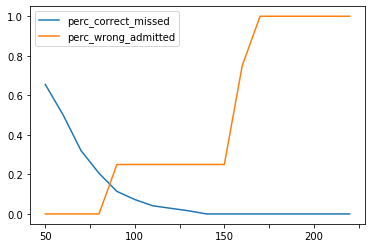

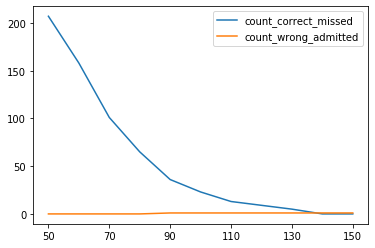

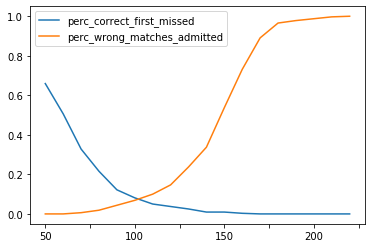

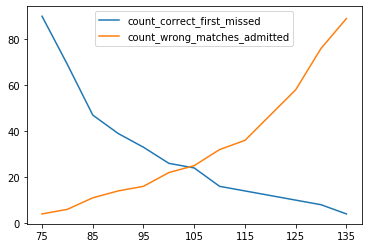

In [22]:
# BF
analyse_wrong_threshold(correct, wrong, True, d_wo_invalid)

Decided to still go for 137, as it will retain correct matches which is important for the user.

Data quality overall will be worse, but for now it would probably be sufficient. 

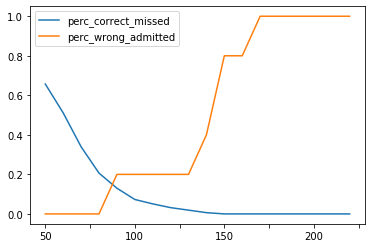

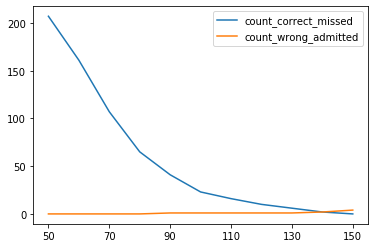

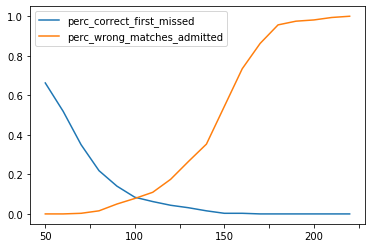

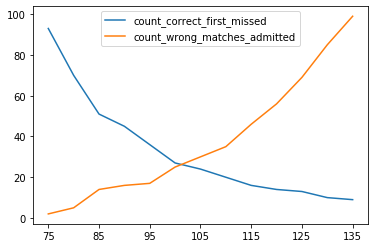

In [26]:
# Flann
analyse_wrong_threshold(correct, wrong, True, d_wo_invalid)

Not much difference with Flann, especially on the numer of wrong matches. No change for now.

In [119]:
def invalid_images_stats(d):
    max_valids = []
    min_invalids = []
    all_invalid_dists = []
    for img, dists_d in d.items():
        if img.split('/')[0]!=str(47):  # we want to skip the bad images
            valid_dists = []
            invalid_dists = []
            for imgname, dist in dists_d.items():
                c = imgname.split('/')[0]
                if int(c)<47:
                    valid_dists.append(dist)
                else:
                    invalid_dists.append(dist)
                    all_invalid_dists.append(dist)
            max_valids.append(max(valid_dists))
            min_invalids.append(min(invalid_dists))
    return max_valids, min_invalids, all_invalid_dists

In [120]:
max_valids, min_invalids, all_invalid_dists = invalid_images_stats(d)

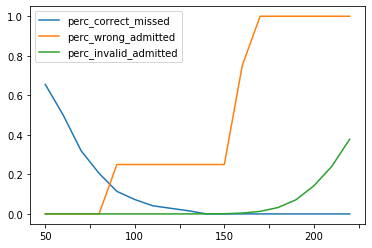

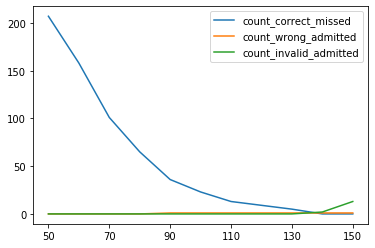

In [70]:
analyse_wrong_threshold(correct, wrong, all_invalid_dists=all_invalid_dists)

### Choosing just one image to compare the invalids to

In [39]:
def invalid_images_stats(d, img_no):
    """
    Takes the distances d, choose the first image (the classic orange hold) and 
    returns it sdistances with all invalid photos in the all_invalid_dists list. 
    """
    max_valids = []
    min_invalids = []
    all_invalid_dists = []
    img, dists_d = list(d.items())[img_no-1] # just taking the first img - '1/IMG_20191212_215229.jpg
    valid_dists = []
    invalid_dists = []
    for imgname, dist in dists_d.items():
        c = imgname.split('/')[0]
        if int(c)<47:
            valid_dists.append(dist)
        if int(c)==48:
            print(f"{imgname}: {dist}")
            invalid_dists.append(dist)
            all_invalid_dists.append(dist)
    max_valids.append(max(valid_dists))
    min_invalids.append(min(invalid_dists))
    
    _ = plt.hist(valid_dists, density=True, bins=30)
    _ = plt.hist(invalid_dists, density=True, bins=30)
    plt.show()
    return max_valids, min_invalids, all_invalid_dists, valid_dists, invalid_dists


48/besta-burs-tv-bench-high-gloss-white__0257776_PE402056_S5.webp: 197.0
48/golden-retriever-puppy.jpg: 194.0
48/rBVaV13ZHTCAO1R5AASAniFp3no234.jpg: 216.0
48/sun-filters_Where-do-they-come-from.webp: 246.0
48/2018-Wickes-Ohio-Cream-IMG-Main-RESP.jpeg: 217.0
48/download (1).jpeg: 247.0
48/IMG_20200111_082700.jpg: 250.0
48/download (2).jpeg: 216.0
48/Aleciaupholsteredbedgreylinen__66152.1546022718.jpg: 210.0
48/Road_in_Norway.jpg: 247.0
48/chair.jpg: 195.0
48/ondra.jpg: 202.0
48/960x0.jpg: 255.0
48/Customers-crowd-around-the-Castle-Cafe-anxious-to-grab-a-coffee-and-relax-for-a-bit-650x432.png: 258.0
48/ff27913aa983de12f773dfa09ed03be9.jpg: 247.0
48/911-road-3629a.jpg: 242.0
48/jute_carpets_mobile.jpg: 225.0
48/190313-creamy-lemon-parmesan-chicken-horizontal-1553026901.png: 218.0


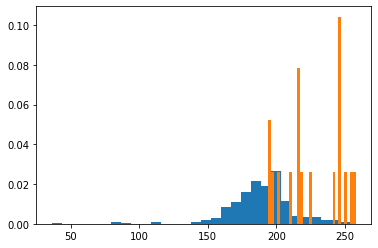

In [42]:
max_valids, min_invalids, all_invalid_dists, valid_dists, invalid_dists = invalid_images_stats(d, 300)

There's quite a lot of overlap unfortunately. Maybe you could use a very high threshold to get the worst ones out

If we wanted to retain all valid ones, how many invalid can we remove? Only 7% with IMG 1 --> do a plot for all images

In [132]:
len([i for i in invalid_dists if i > max_valids[0]]) / len(invalid_dists)

0.06976744186046512

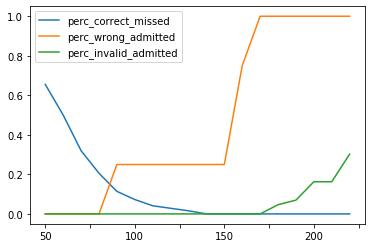

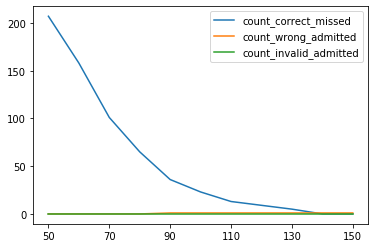

In [73]:
analyse_wrong_threshold(correct, wrong, all_invalid_dists=all_invalid_dists)

### Test set (Yonder)

The steps would be to match with Yonder and I would expect to see few incorrect matches under 137, and get all correct matches. 

However I know that images from Yonder are a bit different...

In [118]:
dataset_path = 'data/categories_yonder_cbir_small'
DETECTOR_TYPE = 'orb'
NO_CATS = 38
NO_FEATURES = 450
GREY = True

In [119]:
descriptors = cbir_helpers.gen_descriptors(dataset_path, DETECTOR_TYPE, NO_CATS, NO_FEATURES, GREY)

Time elapsed generating descriptors: 3.1919798851013184


In [120]:
len(list(descriptors.keys()))

137

In [121]:
d = cbir_helpers.match_images('BF', descriptors)

Time elapsed matching all images: 27.73279857635498


In [122]:
cbir_helpers.get_stats(d)

Max correct: 141.0
Min wrong: 51.0
Total number of images: 137
Number wrong: 21
Number wrong below threshold: 21
% wrong below max correct: 15.0%
% wrong overall: 15.0%
% wrong overall top 3: 3.0%


In [122]:
min_dists = cbir_helpers.get_min_dists(d)

In [123]:
correct, wrong = cbir_helpers.find_correct_wrong_dists(min_dists)

In [124]:
max(correct)

141.0

In [125]:
[c for c in correct if c > 137]

[141.0]

In [126]:
min(wrong)

51.0

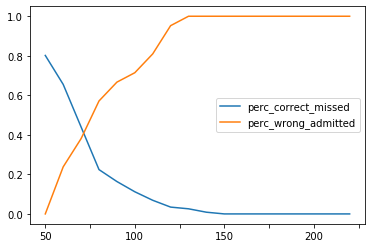

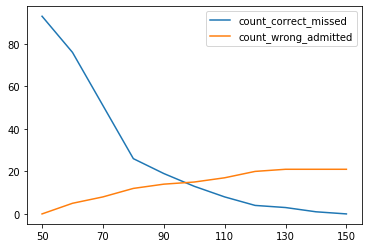

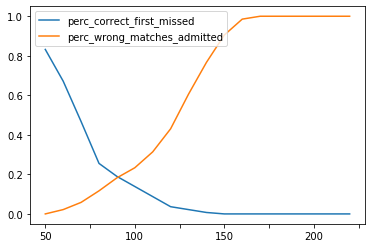

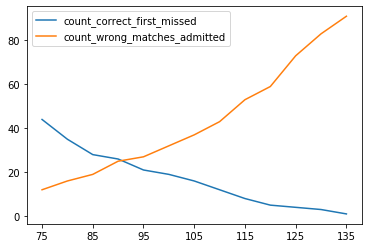

In [127]:
analyse_wrong_threshold(correct, wrong, prod=True, d=d)

For this dataset the threshold does not remove any wrong matches. But I know that those "wrong" matches are because that hold physically appeared in the another route's image. So you cant' blame it. 

On the correct side, only 1 correct match is prevented - not too bad.